In [30]:
# 프로야구 연봉 데이터셋의 기본 정보 구하기

%matplotlib inline

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']

# Data Source : http://www.statiz.co.kr/

picher_file_path = './data/picher_stats_2017.csv'
batter_file_path = './data/batter_stats_2017.csv'

picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

picher.columns
picher.head()
picher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [31]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

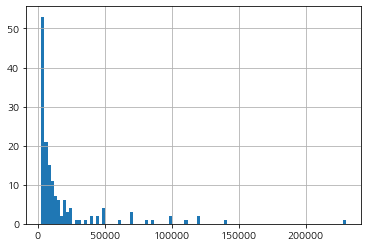

In [32]:
picher['연봉(2018)'].hist(bins=100)

<AxesSubplot:>

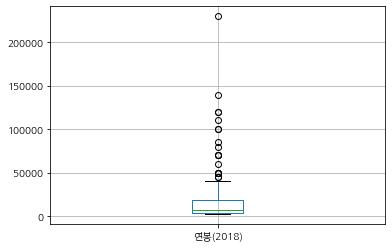

In [33]:
picher.boxplot(column=['연봉(2018)'])

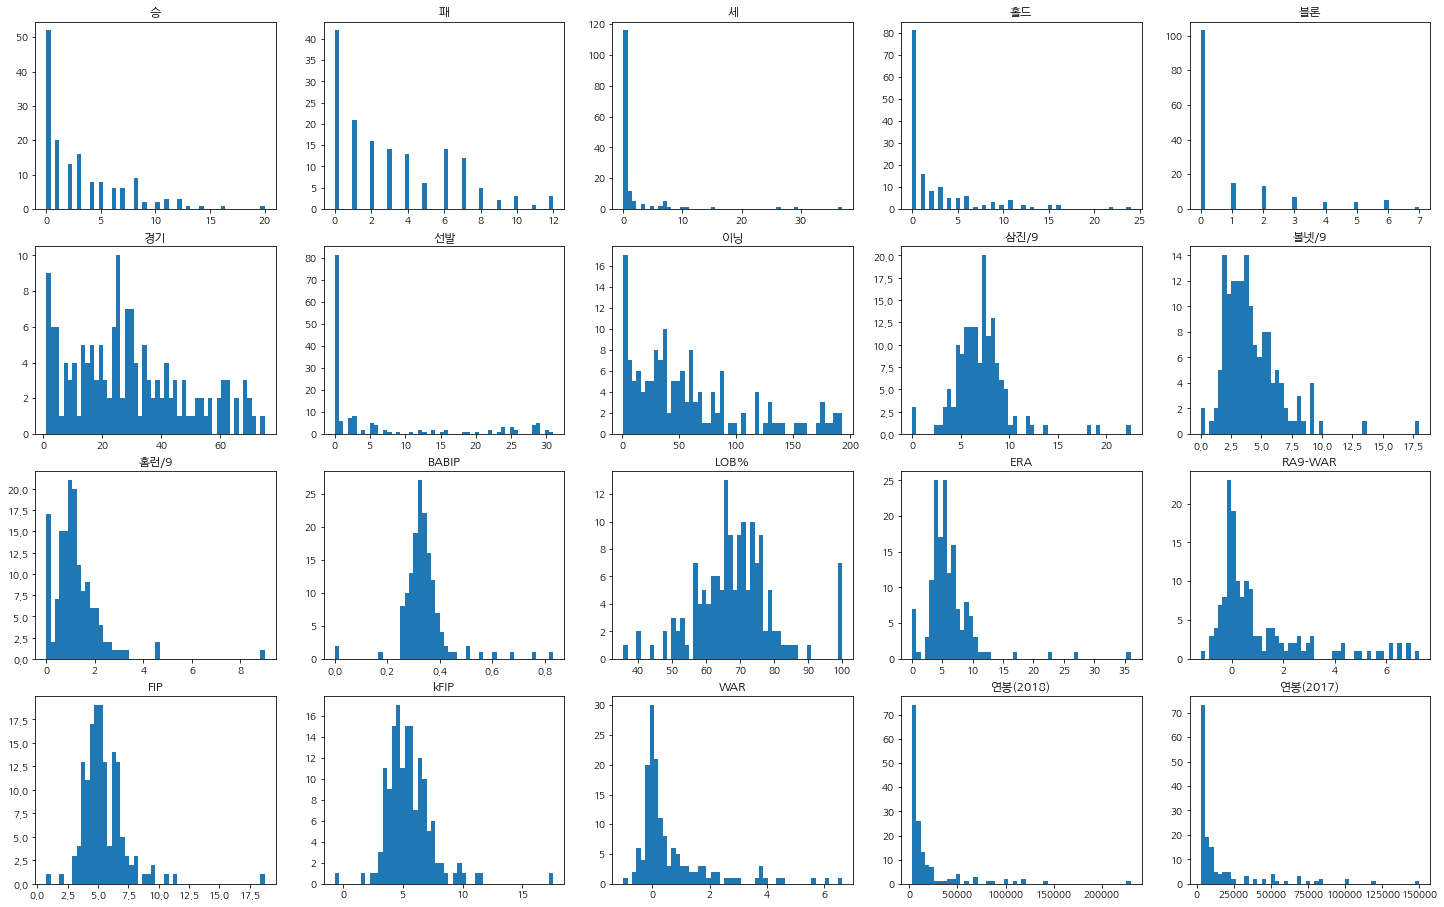

In [34]:
picher_features_df = picher[['승','패','세','홀드','블론','경기','선발','이닝','삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)', '연봉(2017)']]

def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [25, 20]
    fig = plt.figure(1)

    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

plot_hist_each_column(picher_features_df)

## 예측: 투수의 연봉 예측하기
- 표준화 : 정규분포의 z-값을 구하는 과정과 동일
-  z-값 : ((X) - (X의 평균)/X의 표준편차)


In [35]:
pd.options.mode.chained_assignment = None

def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x-series_mean)/series_std)
    return df

scale_columns = ['승','패','세','홀드','블론','경기','선발','이닝','삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)
picher_df = picher_df.rename(columns = {'연봉(2018)':'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,3.912893,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,3.266495,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,6.821679,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,2.620098,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,2.975617,2.734705


In [36]:
# 팀명 피처를 원-핫 인코딩으로 변환
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)
team_encoding.head(5)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [37]:
# 회귀 분석을 위한 학습, 테스트 데이터셋 분리
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test =  m (X, y, test_size=0.2, random_state=19)

lr = linear_model.LinearRegression()
model = lr.fit(X_test, y_train)

print(lr.coef_)

ValueError: Found input variables with inconsistent numbers of samples: [31, 121]